## SQL INDEXES CONSTRAINT 

#### An index is a schema object. 
#### It is used by the server to speed up the retrieval of rows by using a pointer. 
#### It can reduce disk I/O(input/output) by using a rapid path access method to locate data quickly. 

#### An index helps to speed up select queries and where clauses, but it slows down data input, with the update and the insert statements. 

## Generally, when you create an index on a table, database will automatically use that index while searching for data in that table. You don't need to do anything about that.


## What are some best practices and “rules of thumb” for creating database indexes?

##### Index ALL primary keys (I think most RDBMS do this when the table is created).
###### Index ALL foreign key columns.

#### Create more indexes ONLY if:

##### Queries are slow.
##### You know the data volume is going to increase significantly.
##### Run statistics when populating a lot of data in tables.

#### If a query is slow, look at the execution plan and:

##### If the query for a table only uses a few columns, put all those columns into an index, then you can help the RDBMS to only use the index.
##### Don't waste resources indexing tiny tables (hundreds of records).
##### Index multiple columns in order from high cardinality to less. This means: first index the columns with more distinct values, followed by columns with fewer distinct values.
###### If a query needs to access more than 10% of the data, a full scan is normally better than an index.

#### Indexes can be created or dropped with no effect on the data.

## CREATE INDEX Syntax-

### CREATE INDEX firstname_index
### ON TABLE authors;

#### where index is the name given to that index and TABLE is the name of the table on which that index is created 
#### and column is the name of that column for which it is applied.

### On multiple column Syntax-

#### CREATE INDEX index
#### ON TABLE_NAME (cloumn1, column2,.....);

### Unique Index Syntax –

#### CREATE UNIQUE INDEX index
#### ON TABLE column;

#### Unique indexes are used for the maintenance of the integrity of the data present in the table as well as for the fast performance, 
#### it does not allow multiple values to enter into the table.

### ALTER TABLE table_name
### DROP INDEX index_name;; -- drop index from table 

### Confirming Indexes –

#### SELECT title
#### FROM books USE INDEX (isbn)
#### WHERE id<5;



#### SELECT  ba.author_id, b.title, a.last_name
#### FROM book_author ba USE INDEX (book_id) , books b ,authors a
#### WHERE ba.author_id=a.id AND ba.book_id=b.id;

### -The database is using the index column 'book_id'  to retrive data from other fields i.e (fetching data referring 'book_id')






# https://www.sqlservertutorial.net/sql-server-indexes/sql-server-create-index/

## SQL CHECK CONSTRAINT 

#### Check Constraint is used to specify a predicate that every tuple must satisfy in a given relation. 
#### It limits the values that a column can hold in a relation.

#### The predicate in check constraint can hold a sub query.
#### Check constraint defined on an attribute restricts the range of values for that attribute.
#### If the value being added to an attribute of a tuple violates the check constraint,
#### the check constraint evaluates to false and the corresponding update is aborted.
#### Check constraint is generally specified with the CREATE TABLE command in SQL.

### Example Syntax :

### CREATE TABLE Persons (
### ID int NOT NULL,
### LastName varchar(255) NOT NULL,
### FirstName varchar(255),
### Age int,
### CHECK (Age>=18)
### );

### SQL creates a CHECK constraint on the "Age" column when the "Persons" table is created. 
### The CHECK constraint ensures that the age of a person must be 18, or older

### Another example:

### CREATE TABLE pets(
### ID INT NOT NULL,
### Name VARCHAR(30) NOT NULL,
### Breed VARCHAR(20) NOT NULL,
### Age INT,
### GENDER VARCHAR(9),
### PRIMARY KEY(ID),
### check(GENDER in ('Male', 'Female')) 

### */  SQL command restricts the GENDER to belong to only the categories specified. 
### If a new tuple is added or an existing tuple in the relation is updated with a GENDER that doesn’t 
### belong to any of the two categories mentioned, then the corresponding database update is aborted */
### );

### SQL CHECK on ALTER TABLE

### ALTER TABLE pets
### ADD CONSTRAINT CHK_pet CHECK (Age<5 AND Breed='GOLDEN RETRIEVER'); --on multiple columns check 

### DROP a CHECK Constraint

### ALTER TABLE pets
### DROP CONSTRAINT CHK_pet

In [ ]:
# cont from here tomorrow 

### SQL VIEWS

#### Views in SQL are kind of virtual tables.
#### A view also has rows and columns as they are in a real table in the database. 
#### We can create a view by selecting fields from one or more tables present in the database. 
#### A View can either have all the rows of a table or specific rows based on certain condition.

#### In SQL, a view is a virtual table based on the result-set of an SQL statement.

#### You can add SQL functions, WHERE, and JOIN statements to a view and present the data as if the data were 
#### coming from one single table.

### Syntax- 

#### CREATE VIEW view_name AS # AS a.k.a aliases is used to store the result set in the view name 
#### SELECT column1, column2.....
#### FROM table_name
#### WHERE condition;

##### -->view_name: Name for the View
##### -->table_name: Name of the table
##### -->condition: Condition to select rows

### Creating View from a single table:

#### CREATE VIEW author_details AS 
#### SELECT id,first_name,last_name 
#### FROM authors
#### WHERE id<6

### To see the data in the View, we can query the view in the same manner as we query a table.
### SELECT * FROM author_details;

### Creating View from multiple tables:

### CREATE VIEW author_book_details AS
### SELECT a.id,a.first_name,b.title 
### FROM books b, authors a, book_author ba
### WHERE a.id=ba.author_id AND b.id=ba.book_id

### SELECT * FROM author_book_details

## DELETING VIEWS

### DROP VIEW view_name

### DROP VIEW author_details

### UPDATING VIEWS 

### A view can be updated with the CREATE OR REPLACE VIEW command. Syntax is-

### CREATE OR REPLACE VIEW author_details AS
### SELECT id, first_name
### FROM authors
### WHERE id<6

###  There are certain conditions needed to be satisfied to update a view. 

### If any one of these conditions is not met, then we will not be allowed to update the view.

#### The SELECT statement which is used to create the view should not include GROUP BY clause or ORDER BY clause.
#### The SELECT statement should not have the DISTINCT keyword.
#### The View should have all NOT NULL values.
#### The view should not be created using nested queries or complex queries.
#### The view should be created from a single table. If the view is created using multiple tables then we will not be allowed to update the view.

#### Some views are updatable. That is, you can use them in statements such as UPDATE, DELETE, or INSERT to update the contents of the underlying table. For a view to be updatable, there must be a one-to-one relationship between the rows in the view and the rows in the underlying table.

### Inserting a row in a view:

#### We can insert a row in a View in a same way as we do in a table. 
#### We can use the INSERT INTO statement of SQL to insert a row in a View.

### Syntax:

#### INSERT INTO view_name(column1, column2 , column3,..) 
#### VALUES(value1, value2, value3..);


### Deleting a row in a view:

#### Deleting rows from a view is also as simple as deleting rows from a table. 
#### We can use the DELETE statement of SQL to delete rows from a view. 
#### Also deleting a row from a view first delete the row from the actual table and the change is then reflected in the view.

### Syntax:

#### DELETE FROM view_name
#### WHERE condition;


### SQL Variables 

### Sometimes, you want to pass a value from an SQL statement to another SQL statement. To do this, you store the value in a MySQL user-defined variable in the first statement and refer to it in the subsequent statements.

### To create a user-defined variable, you use the format @variable_name, where the variable_name consists of alphanumeric characters. The maximum length of the user-defined variable is 64 characters as of MySQL 5.7.5

### The user-defined variables are not case-sensitive. It means that the @id and @ID are the same.

### You can assign the user-defined variable to a certain data types such as integer, floating point, decimal, string or NULL.

### A user-defined variable defined by one client is not visible by other clients. In other words, an user-defined variable is session-specific.

### Note that the user-defined variables are the MySQL-specific extension to SQL standard. They may not be available in other database systems.

## MySQL variable assignment

### There are two ways to assign a value to a user-defined variable.

### The first way is to use the SET statement as follows:

### SET @variable_name := value;

### You can use either := or = as the assignment operator in the SET statement. For example, the statement assigns number 100 to the variable @counter.

### SET @counter := 100;


### The second way to assign a value to a variable is to use the SELECT statement. In this case, you must use the := assignment operator because, within the SELECT statement, MySQL treats the = operator as the equal operator.

### SELECT @variable_name := value;

### After the assignment, you can use the variable in the subsequent statement where an expression is permitted e.g., in WHERE clause, INSERT or UPDATE statement.


## MySQL variable examples

### SELECT @count:=COUNT(id)
### FROM books;


### SELECT title
### FROM books
### WHERE id=@count;


### A user-defined variable can hold a single value only. If the SELECT statement returns multiple values, the variable will take the value of the last row in the result.

### SELECT @nm:=first_name
### FROM authors
### WHERE id <10
### ORDER BY first_name;

### SELECT @nm;


## What is Stored Procedures in SQL ?

#### Stored Procedures are created to perform one or more DML operations on Database. 

#### It is nothing but the group of SQL statements that accepts some input in the form of parameters and performs some task.

#### A procedure is a stored program that you can pass parameters into. It does not return a value like a function does.

#### A stored procedure is a prepared SQL code that you can save, so the code can be reused over and over again.

#### So if you have an SQL query that you write over and over again, save it as a stored procedure, and then just call it to execute it.

#### You can also pass parameters to a stored procedure, so that the stored procedure can act based on the parameter value(s) that is passed.

## Example Syntax-

### DELIMITER  //

### -->  CREATE PROCEDURE GetAuthors()

### -->  BEGIN
### ---> SELECT first_name,last_name
### ---> FROM authors 
### ---> ORDER BY id;    
### ---> END //

### DELIMITER ;

### Once you save the stored procedure, you can invoke it by using the CALL statement:

### CALL getAuthors();

### The first time you invoke a stored procedure, MySQL looks up for the name in the database catalog, compiles the stored procedure’s code, place it in a memory area known as a cache, and execute the stored procedure.

### If you invoke the same stored procedure in the same session again, MySQL just executes the stored procedure from the cache without having to recompile it.

## A stored procedure can have parameters so you can pass values to it and get the result back . In MySQL, a parameter has one of three modes: IN,OUT, or INOUT.


### IN is the default mode. When you define an IN parameter in a stored procedure, the calling program has to pass an argument to the stored procedure. In addition, the value of an IN parameter is protected. It means that even the value of the IN parameter is changed inside the stored procedure, its original value is retained after the stored procedure ends. In other words, the stored procedure only works on the copy of the IN parameter.

### DELIMITER //

### CREATE PROCEDURE selectbook(IN bookName VARCHAR(255))
### BEGIN
### SELECT * FROM books WHERE title=bookName;
### END //
### DELIMITER ;

### To view result-

### CALL selectbook('The Runaway');


### OUT parameter-

### The value of an OUT parameter can be changed inside the stored procedure and its new value is passed back to the calling program. Notice that the stored procedure cannot access the initial value of the OUT parameter when it starts.

### DELIMITER //

### CREATE PROCEDURE GetCountBooks (OUT total INT)
### BEGIN
### SELECT COUNT(id) INTO total FROM books;
### END//

### DELIMITER ;

### To view result- 

### CALL GetCountBooks(@total);
### SELECT @total;


### INOUT parameters

### An INOUT  parameter is a combination of IN  and OUT  parameters. It means that the calling program may pass the argument, and the stored procedure can modify the INOUT parameter, and pass the new value back to the calling program.

### The following example demonstrates how to use an INOUT parameter in the stored procedure.

### DELIMITER //

### CREATE PROCEDURE SetCounter( INOUT counter INT, IN inc INT)
### BEGIN
### SET counter = counter + inc;
### END//

### DELIMITER ;

### To execute-

### SET @counter = 1;
### CALL SetCounter(@counter,1); -- 2
### CALL SetCounter(@counter,1); -- 3
### CALL SetCounter(@counter,5); -- 8
### SELECT @counter;

## Drop or Delete a SQL Server Stored Procedure-

#### DROP PROCEDURE  SetCounter;

## The following statement shows all stored procedure in the current MySQL server:

### SHOW PROCEDURE STATUS WHERE db ='python_mysql';




### SQL Trigger

#### A trigger is a stored procedure in database which automatically invokes whenever a special event in the database occurs.

#### For example, a trigger can be invoked when a row is inserted into a specified table or when certain table columns are being updated.

#### MySQL supports triggers that are invoked in response to the INSERT, UPDATE or DELETE event.


### Syntax:

#### CREATE TRIGGER trigger_name
#### {BEFORE | AFTER} {INSERT | UPDATE| DELETE }
#### ON table_name FOR EACH ROW
#### trigger_body;

### Syntax explanation 

#### --> create trigger [trigger_name]: Specify the name of the trigger that you want to create after the CREATE TRIGGER keywords. Note that the trigger name must be unique within a database.
#### --> [before | after]: specify the trigger action time which can be either BEFORE or AFTER which indicates that the trigger is invoked before or after each row is modified.
#### --> {insert | update | delete}:  specify the operation that activates the trigger, which can be INSERT, UPDATE, or DELETE.
#### --> on [table_name]: specify the name of the table to which the trigger belongs after the ON keyword.
#### --> [for each row]: This specifies a row-level trigger, i.e., the trigger will be executed for each row being affected.
#### --> [trigger_body]: The trigger body can access the values of the column being affected by the DML statement.

#### BEFORE triggers run the trigger action before the triggering statement is run.
#### AFTER triggers run the trigger action after the triggering statement is run.

## Let's look at how triggers work- 


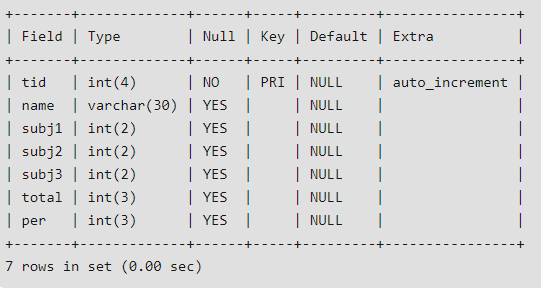

In [2]:
from PIL import Image 
image1=Image.open("C:/Users/Admin/Pictures/Screenshots/Screenshot (43).png")
image1 # SAMPLE STUDENTS TABLE  DATABASE LOOK 

#### Create a trigger so that the total and average of specified marks is automatically inserted whenever a record is insert.

#### Here, as trigger will invoke before record is inserted so, BEFORE Tag can be used.

### On running the below code - 
#### make sure to run the below syntax on student table query tab 
-- create trigger stud_marks 

-- before INSERT 

-- on 

-- student 

-- for each row

-- SET NEW.total= NEW.subj_1 + NEW.subj_2 + NEW.subj_3,NEW.pert=NEW.total * 60 / 10;

#### Above SQL statement will create a trigger in the student database in which whenever subjects marks are entered,
#### before inserting this data into the database, trigger will compute those two values and insert with the entered values.

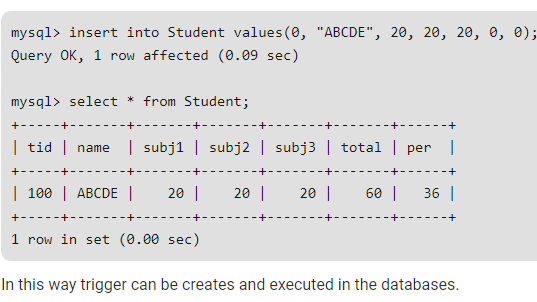

In [1]:
from PIL import Image 
image1=Image.open("C:/Users/Admin/Pictures/Screenshots/Screenshot (42).png")
image1

# https://www.mysqltutorial.org/create-the-first-trigger-in-mysql.aspx

## SQL RELATIONSHIPS 

### In a relational database, a relationship is formed by correlating rows belonging to different tables. 

### A table relationship is established when a child table defines a Foreign Key column that references the Primary Key column of its parent table.

### Every database table relationship is, therefore, built on top of Foreign Key columns, 

### A relationship is considered identifying when one table is entirely dependent on the other to exist.

### A relationship is considered identifying when one table is entirely dependent on the other to exist. A row in that table depends on a row in the other table. 

### and there can be three table relationship types:

#### -->one-to-one  requires the child table Primary Key to be associated via a Foreign Key with the parent table 
####    Primary Key column.

#### A pair of tables bears a one-to-one relationship when a single record in the first table is related to only 
#### one record in the second table,and a single record in the second table is related to only one record in the first table.


#### -->one-to-many  is the most common relationship, and it associates a row from a parent table to multiple rows in a child table.

#### A one-to-many relationship exists between a pair of tables when a single record in the first table can be related to one or 
#### more records in the second table, but a single record in the second table can be related to only one record in the first table. 

#### -->many-to-many requires a link table containing two Foreign Key columns that reference the two different parent tables.

#### A pair of tables bears a many-to-many relationship when a single record in the first table can be related to one or more 
#### records in the second table and a single record in the second table can be related to one or more records in the first table.

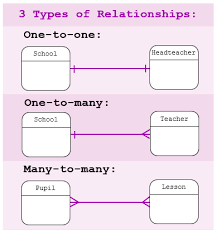

In [3]:
from PIL import Image 
image1=Image.open("C:/Users/Admin/Desktop/MySQL/db-relationships.png")
image1


# https://www.geeksforgeeks.org/difference-between-sql-and-nosql/

# https://www.w3schools.com/sql/sql_ref_mysql.asp